This is needed to reload modules without restarting the kernel

In [1]:
%load_ext autoreload
%autoreload 2

This is needed to add eda_tools from the directories above

In [2]:
import os
os.sys.path.append('../../')

# Trying to use CatBoost for reweighting

In [3]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
f = uproot.open('/mnt/storage/lborgna/NNT/data17_with_weights.root')

In [6]:
df_cr = f['control'].pandas.df()

In [7]:
df_cr.columns

Index(['run_number', 'event_number', 'mc_sf', 'ntag', 'njets',
       'kinematic_region', 'm_min_dj', 'm_max_dj', 'pairing_score_1',
       'pairing_score_2', 'lead_jet_pT', 'lead_jet_tag', 'HT', 'm_hh_cor',
       'm_hh', 'pt_hh', 'dEta_hh', 'X_wt', 'X_wt_2', 'trig_bucket', 'm_h1',
       'E_h1', 'pT_h1', 'eta_h1', 'phi_h1', 'm_h2', 'E_h2', 'pT_h2', 'eta_h2',
       'phi_h2', 'm_h1_j1', 'E_h1_j1', 'pT_h1_j1', 'eta_h1_j1', 'phi_h1_j1',
       'tag_h1_j1', 'quantile_h1_j1', 'angle_h1_j1', 'm_h1_j2', 'E_h1_j2',
       'pT_h1_j2', 'eta_h1_j2', 'phi_h1_j2', 'tag_h1_j2', 'quantile_h1_j2',
       'angle_h1_j2', 'm_h2_j1', 'E_h2_j1', 'pT_h2_j1', 'eta_h2_j1',
       'phi_h2_j1', 'tag_h2_j1', 'quantile_h2_j1', 'angle_h2_j1', 'm_h2_j2',
       'E_h2_j2', 'pT_h2_j2', 'eta_h2_j2', 'phi_h2_j2', 'tag_h2_j2',
       'quantile_h2_j2', 'angle_h2_j2', 'pT_4', 'pT_2', 'eta_i', 'dRjj_1',
       'dRjj_2', 'NN_d24_weight_bstrap_med_17',
       'NN_d24_weight_bstrap_perc_25_17', 'NN_d24_weight_bstrap_perc_75

In [8]:
from eda_tools.NN_RW import nominal, louppe_loss, log_inputs, create_labels, NN

In [9]:
features_to_rw = nominal()

In [240]:
features_to_rw

{'rw_cols_to_log': ['pT_2', 'pT_4', 'dRjj_1', 'dRjj_2', 'pt_hh', 'X_wt'],
 'rw_cols_log': ['pT_2_log',
  'pT_4_log',
  'eta_i',
  'dRjj_1_log',
  'dRjj_2_log',
  'njets',
  'pt_hh_log',
  'X_wt_log',
  'dR_hh',
  'dPhi_h1',
  'dPhi_h2']}

In [11]:
from eda_tools.utilities import calculatedPhi, calculatedRhh

In [12]:
calculatedPhi(df_cr)
calculatedRhh(df_cr)

In [13]:
log_inputs(df_cr, to_log=features_to_rw['rw_cols_to_log'])

In [14]:
rw_columns =features_to_rw['rw_cols_log']

In [15]:
train_size = df_cr.shape[0]

In [105]:
rw_columns = ['pT_2_log',
 'pT_4_log',
 'eta_i',
 'dRjj_1_log',
 'dRjj_2_log',
 'pt_hh_log',
 'X_wt_log',
 'dR_hh',
 'dPhi_h1',
 'dPhi_h2',
 'njets']

In [111]:
original = df_cr.loc[df_cr['ntag'] == 2, rw_columns]

In [112]:
target = df_cr.loc[df_cr['ntag']>=4, rw_columns]

In [113]:
original

pT_2_log  pT_4_log     eta_i  dRjj_1_log  dRjj_2_log  pt_hh_log  \
entry                                                                      
0        4.922156  4.094102  0.580108    0.077623    0.150979   3.901757   
1        4.068959  3.933927  0.692013   -0.552564    0.324374   3.571677   
2        4.276298  3.850584  0.894322    0.301334    1.091012   3.377382   
3        5.381969  4.357126  0.983023   -0.239998    0.062671   4.999299   
4        5.260033  4.285115  1.413674   -0.217042   -0.146484   4.207677   
5        4.425352  3.731540  0.971146   -0.636863    1.049535   5.407742   
6        4.371934  3.996421  0.802582   -0.301371    0.433289   2.369798   
7        5.728394  3.768245  0.219820   -0.366669   -0.300089   2.704737   
8        4.845779  3.800416  0.558395    0.165575    0.467377   4.671606   
10       4.079907  3.934079  0.902028   -0.148090    0.699897   3.649770   
11       4.205709  3.980937  1.043904    0.305427    0.635830   4.095363   
12       4.860229  4.128225  1.130651   -0.274446    0.224411   2.518393   
13       4.512429  4.015805  0.286496    0.039085    0.086806   4.823994   
14       4.620806  3.870196  0.582504   -0.052117    0.290201   3.274954   
15       4.171226  3.910673  0.628554   -0.428503    0.764252   3.960804   
16       4.117211  3.972415  1.648102   -0.401011    0.493303   3.153784   
17       4.625154  3.927419  0.413974   -0.185235    0.943292   3.798762   
18       4.268971  3.887365  0.778637    0.225887    0.273637   3.946278   
19       4.215099  3.945533  0.567899   -0.056314    0.970600   4.231336   
20       4.115193  3.746486  0.618384   -0.606162   -0.148914   2.489505   
21       3.963391  3.923266  1.062824   -0.346466    0.031154   3.187351   
22       4.518710  4.044741  0.623641   -0.089165    0.297681   4.296968   
23       5.076861  3.962086  0.525389    0.249090    0.434479   3.291664   
24       5.201598  4.669705  0.887915   -0.493154    0.017805   5.405745   
25       4.970234  4.489720  0.701683   -0.511838   -0.196270   3.539011   
26       4.844100  4.031601  0.894717   -0.077244    0.430106   4.212218   
27       4.089735  3.873894  0.832969   -0.365590    0.667410   3.485187   
28       5.082497  3.977228  0.823697    0.444062    0.506101   3.598441   
29       5.064955  4.133633  1.280591   -0.514638   -0.142625   4.378443   
30       4.288091  3.698337  1.483277    0.001831    0.578782   3.399734   
...           ...       ...       ...         ...         ...        ...   
1790739  4.117067  4.036268  0.897309   -0.340141    0.030689   0.730952   
1790741  4.034753  3.704261  1.005837   -0.389014   -0.349418   3.023674   
1790742  4.496952  4.204583  0.428179    0.178234    0.673558   3.467210   
1790743  4.425931  4.127877  0.629423    0.338763    0.518127   3.740530   
1790745  4.635815  3.876740  0.824521   -0.630359    0.527442   5.776041   
1790746  4.707517  4.584311  0.376794   -0.453990   -0.078475   4.018230   
1790747  4.169915  4.135147  0.634372   -0.756893    0.800141   3.541670   
1790748  4.879678  4.338527  1.762005    0.111896    0.239308   4.379986   
1790749  4.601040  4.123965  1.105937   -0.594329    0.441062   5.063254   
1790751  4.426315  4.096428  2.245350   -0.422193   -0.197269   1.974182   
1790752  4.358367  4.038763  0.736982    0.578078    0.688792   3.232389   
1790753  4.535988  4.075972  1.638743    0.025521    0.293850   2.347511   
1790754  4.275841  3.816339  0.970604   -0.454015    1.008838   4.131196   
1790755  5.033963  4.387225  0.521056   -0.627668   -0.377015   4.486866   
1790756  4.577065  3.938604  0.466963    0.213254    1.140478   4.051449   
1790757  4.121758  3.787156  0.890737   -0.656387    0.225689   2.171549   
1790758  4.321007  4.276999  0.662274   -0.107214    0.288926   4.199488   
1790759  4.142213  3.869642  0.647904   -0.288926    0.577648   4.079725   
1790760  4.841475  3.933469  0.633689   -0.259481    0.337493   3.286627   
1790762  5.256459  4.052134  0.848794   -0.183293    0.19

In [119]:
X_all = pd.concat((original, target), ignore_index=True)
Y_all = create_labels(original, target)

In [120]:
Y_all = Y_all.astype('float32')

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
scaler = StandardScaler()

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
Y_all = Y_all.copy()

In [126]:
le = LabelEncoder()

In [127]:
Y_all = le.fit_transform(Y_all)

In [128]:
Y_all

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_all.iloc

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [161]:
X_train.iloc[:,:-1].head()

pT_2_log  pT_4_log     eta_i  dRjj_1_log  dRjj_2_log  pt_hh_log  \
370758   5.292234  4.334381  0.375259   -0.591632   -0.479953   2.271485   
1323488  4.331126  4.230098  1.459143   -0.738854    0.324213   4.265568   
678156   4.781810  4.119265  1.473715   -0.228573    0.282661   3.574306   
608103   4.267179  3.835494  0.462874   -0.563148   -0.505788   4.029451   
967480   4.144654  3.712728  1.346678    0.136239    0.692011   2.828241   

         X_wt_log     dR_hh   dPhi_h1   dPhi_h2  
370758   1.672788  3.200233  0.463931  0.236301  
1323488  1.018897  2.677643  1.849763  2.698148  
678156   1.027316  2.981109  0.755850  0.122448  
608103   1.104423  1.471594  2.541605  3.007390  
967480   1.264395  3.058791  1.458833  1.794606

In [162]:
X_train.shape

(1414659, 11)

In [163]:
X_train_scaled.shape

(1414659, 11)

In [180]:
test = scaler.fit_transform(X_train.iloc[:, :-1])

In [189]:
test.shape

(1414659, 10)

In [199]:
njets = X_train.njets.values

In [204]:
test.shape

(1414659, 10)

In [206]:
pd.DataFrame(np.column_stack((test, njets)), columns=rw_columns)

pT_2_log  pT_4_log     eta_i  dRjj_1_log  dRjj_2_log  pt_hh_log  \
0        1.938577  1.418018 -1.303866   -1.321077   -2.233511  -1.827532   
1       -0.614895  0.959515  1.511281   -1.735101   -0.218711   0.688805   
2        0.582481  0.472214  1.549129   -0.300065   -0.322818  -0.183500   
3       -0.784790 -0.775451 -1.076307   -1.240973   -2.298240   0.390848   
4       -1.110316 -1.315218  1.219179    0.725875    0.702790  -1.124961   
5        2.731513  0.429321  0.176137   -1.725903   -1.695911  -1.885969   
6       -0.881358 -0.529671 -1.017013    1.271967    0.685814   0.129352   
7        0.327396  1.024675 -0.721434   -0.655435   -1.091546   0.831777   
8       -1.172084 -0.841600  0.635498   -0.609351   -1.551822   0.931563   
9        0.474481  0.744409 -0.149861    0.432286    0.010509  -0.040200   
10      -0.792437 -0.909200  0.499487   -0.147255    1.708529   0.767911   
11       1.105475  0.041181 -0.063808    0.050298   -0.188468  -1.092299   
12       0.038760 -0.749292  0.467378    0.846497   -0.496392   0.189776   
13      -0.405106  0.683447 -1.579188    0.504007   -0.171647   0.405106   
14       1.833673  1.457221  1.443948   -0.951160   -0.921598   0.359374   
15      -0.390456  0.410844 -0.357935    0.428342    0.618789   0.317257   
16       0.677586  1.387000 -0.889748    1.236947    0.016740   1.084321   
17      -0.568027  0.576038 -1.278920   -1.352378   -0.252656   1.359545   
18       0.522869 -0.252573  1.029021    1.582239    0.089774  -0.219599   
19       2.070481  1.985493 -1.144156   -1.837771   -1.930463   0.672035   
20      -0.595441 -0.736973 -1.176305   -1.751516   -2.229294  -2.298766   
21      -1.414056 -0.706042  0.243664    1.479155    0.390363  -1.703009   
22      -1.194734 -0.134401 -0.451375    0.903198    1.121376  -1.026885   
23       1.009006  0.278916  0.742575    0.666685    1.529519   0.773632   
24       3.075840  0.712762 -1.371193   -0.512996   -1.748140  -0.071117   
25       0.958789  0.200303  0.497808   -0.603502   -1.286004  -0.513016   
26      -0.101490 -0.482148  1.277778    0.772590    0.530541   0.075849   
27      -0.945569 -1.005476 -0.069940    0.253491   -0.442334   0.125243   
28       2.683651 -1.370791 -0.143898   -0.750689   -1.468756   0.429553   
29       0.128203  1.861582 -0.993801    0.854723    0.489898  -0.175247   
...           ...       ...       ...         ...         ...        ...   
1414629 -0.403971  0.160628 -0.144323    0.497376   -0.089016  -0.282714   
1414630  0.301213 -0.388171 -1.198729    1.369958    0.096474  -1.126771   
1414631  1.348344 -0.206496 -0.482553    0.647044   -0.458532  -0.174713   
1414632  1.654619  0.242135  0.617104    0.192898   -1.121340  -0.928837   
1414633  1.300128 -0.497829  1.142669    0.808143   -0.195562   1.122107   
1414634  1.035941 -0.860836  0.799208   -0.769837   -0.591895   0.939029   
1414635 -0.390499  1.036870 -0.908510    1.774933    0.371831  -0.200591   
1414636  1.177483 -0.959941  0.674120    0.876108   -0.543397  -0.796759   
1414637 -0.677253  0.238501  0.947601   -0.656042   -0.067001   1.691817   
1414638 -0.520236 -1.032405  2.207930   -2.105260    0.628261  -0.314548   
1414639 -0.040440  1.214897 -0.947738    0.149953   -0.324424  -0.173290   
1414640  1.571827  0.617425 -0.552131   -0.519953   -0.884319   0.731408   
1414641  1.559103 -0.776907  1.207165   -0.697260   -0.448402  -0.717672   
1414642 -0.423070  0.544625  0.175757    0.618607    1.105472   0.633931   
1414643 -0.562589  0.221822  2.235688   -1.298999   -0.220143  -3.056529   
1414644 -0.062859 -0.597648  1.150465   -0.748887    1.110697   0.432015   
1414645 -0.468244 -0.069191 -0.186632   -0.020358   -0.809737  -0.522142   
1414646 -0.507301 -1.027527 -0.147034   -0.022270    0.116997   0.237154   
1414647 -1.110214 -1.062555  0.514936    0.945918    0.745345   0.793877   
1414648 -0.071521 -0.731774 -0.130345    1.612042    1.394954  -1.248543   
1414649  0.671710 -0.226261 -1.668690    0.924276   -0.35

In [198]:
np.hstack((test, X_train.njets.values))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [196]:
np.concatenate((test, X_train.njets.values.T), axis = 1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [192]:
np.append(test, X_train.njets.values, axis=-1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [207]:
X_train_scaled = scaler.fit_transform(X_train.iloc[:, :-1])
X_test_scaled = scaler.transform(X_test.iloc[:,:-1])

In [208]:
X_train_scaled = pd.DataFrame(
    np.column_stack((X_train_scaled, X_train["njets"])), columns=rw_columns
)
X_test_scaled = pd.DataFrame(
    np.column_stack((X_test_scaled, X_test["njets"])), columns=rw_columns
)

In [209]:
pw_train = np.random.poisson(1, X_train.shape[0])
pw_test = np.random.poisson(1, X_test.shape[0])

In [210]:
from catboost import CatBoostClassifier, Pool

In [211]:
train_data = Pool(data= X_train_scaled, label = Y_train)

In [212]:
model = CatBoostClassifier(iterations=200)

In [213]:
pw_train

array([0, 0, 0, ..., 0, 5, 0])

In [150]:
from catboost import FeaturesData

In [215]:
help(Pool)

Help on class Pool in module catboost.core:

class Pool(_catboost._PoolBase)
 |  Pool(data, label=None, cat_features=None, text_features=None, embedding_features=None, column_description=None, pairs=None, delimiter='\t', has_header=False, ignore_csv_quoting=False, weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, feature_names=None, thread_count=-1)
 |  
 |  Pool used in CatBoost as a data structure to train model from.
 |  
 |  Method resolution order:
 |      Pool
 |      _catboost._PoolBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, label=None, cat_features=None, text_features=None, embedding_features=None, column_description=None, pairs=None, delimiter='\t', has_header=False, ignore_csv_quoting=False, weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, feature_names=None, thread_count=-1)
 |      Pool is an internal data structure that is used by

In [249]:
X_test_scaled.iloc[:,-1].values

array([4., 4., 5., ..., 4., 5., 4.])

In [217]:
data_eval_set = Pool(
    data=FeaturesData(
        num_feature_data=X_test_scaled.iloc[:,:-1].astype("float32").values,
        cat_feature_data=X_test_scaled.iloc[:,-1].values
    ),
    label=Y_test,
    weight=pw_test,
)

CatBoostError: cat_feature_data must be 2D numpy.ndarray, it has shape (353665,) instead

In [218]:
X_train_scaled.shape

(1414659, 11)

In [220]:
X_train_scaled.iloc[:,10]

0          4.0
1          5.0
2          4.0
3          6.0
4          4.0
5          4.0
6          4.0
7          5.0
8          4.0
9          4.0
10         4.0
11         4.0
12         4.0
13         5.0
14         5.0
15         4.0
16         6.0
17         5.0
18         4.0
19         5.0
20         4.0
21         4.0
22         4.0
23         5.0
24         4.0
25         5.0
26         4.0
27         4.0
28         4.0
29         4.0
          ... 
1414629    4.0
1414630    4.0
1414631    4.0
1414632    4.0
1414633    4.0
1414634    4.0
1414635    4.0
1414636    4.0
1414637    5.0
1414638    4.0
1414639    4.0
1414640    6.0
1414641    4.0
1414642    4.0
1414643    5.0
1414644    5.0
1414645    4.0
1414646    4.0
1414647    4.0
1414648    4.0
1414649    4.0
1414650    4.0
1414651    5.0
1414652    4.0
1414653    5.0
1414654    5.0
1414655    4.0
1414656    5.0
1414657    6.0
1414658    4.0
Name: njets, Length: 1414659, dtype: float64

In [239]:
X_train_scaled['njets'] = X_train_scaled['njets'].astype(int)

In [242]:
model.fit(
    X=X_train_scaled,
    y=Y_train,
    cat_features=[10],
    sample_weight=pw_train,
    #eval_set=data_eval_set,
    use_best_model=True,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.5
0:	learn: 0.1528879	total: 241ms	remaining: 47.9s
1:	learn: 0.0941660	total: 427ms	remaining: 42.3s
2:	learn: 0.0801416	total: 580ms	remaining: 38.1s
3:	learn: 0.0771639	total: 719ms	remaining: 35.3s
4:	learn: 0.0763047	total: 863ms	remaining: 33.7s
5:	learn: 0.0758790	total: 1.01s	remaining: 32.7s
6:	learn: 0.0756653	total: 1.16s	remaining: 31.9s
7:	learn: 0.0754663	total: 1.33s	remaining: 31.9s
8:	learn: 0.0753466	total: 1.5s	remaining: 31.8s
9:	learn: 0.0752267	total: 1.67s	remaining: 31.7s
10:	learn: 0.0751589	total: 1.82s	remaining: 31.3s
11:	learn: 0.0750480	total: 1.98s	remaining: 31.1s
12:	learn: 0.0750011	total: 2.15s	remaining: 31s
13:	learn: 0.0748937	total: 2.32s	remaining: 30.8s
14:	learn: 0.0748118	total: 2.48s	remaining: 30.6s
15:	learn: 0.0748116	total: 2.62s	remaining: 30.1s
16:	learn: 0.0748112	total: 2.75s	remaining: 29.6s
17:	learn: 0.0747607	total: 2.92s	remaining: 29.5s
18:	learn: 0.0747607	total: 3.05s	remaining: 29.1s
19:	learn: 0.074717

162:	learn: 0.0716507	total: 24.7s	remaining: 5.61s
163:	learn: 0.0716241	total: 24.9s	remaining: 5.46s
164:	learn: 0.0716241	total: 25s	remaining: 5.31s
165:	learn: 0.0716240	total: 25.2s	remaining: 5.15s
166:	learn: 0.0715973	total: 25.3s	remaining: 5s
167:	learn: 0.0715790	total: 25.5s	remaining: 4.86s
168:	learn: 0.0715575	total: 25.7s	remaining: 4.71s
169:	learn: 0.0715554	total: 25.8s	remaining: 4.56s
170:	learn: 0.0715550	total: 26s	remaining: 4.4s
171:	learn: 0.0715550	total: 26.1s	remaining: 4.25s
172:	learn: 0.0715384	total: 26.3s	remaining: 4.11s
173:	learn: 0.0714971	total: 26.5s	remaining: 3.96s
174:	learn: 0.0714967	total: 26.6s	remaining: 3.8s
175:	learn: 0.0714714	total: 26.8s	remaining: 3.66s
176:	learn: 0.0714474	total: 27s	remaining: 3.51s
177:	learn: 0.0714028	total: 27.1s	remaining: 3.35s
178:	learn: 0.0713661	total: 27.3s	remaining: 3.2s
179:	learn: 0.0713170	total: 27.5s	remaining: 3.05s
180:	learn: 0.0713026	total: 27.6s	remaining: 2.9s
181:	learn: 0.0712995	tot

In [226]:
model.predict_proba(X_train_scaled)

array([[0.00553685, 0.99446315],
       [0.01789102, 0.98210898],
       [0.00988868, 0.99011132],
       ...,
       [0.01890049, 0.98109951],
       [0.02810245, 0.97189755],
       [0.0061863 , 0.9938137 ]])

In [ ]:
X_train_scaled = pd.DataFrame(
    np.column_stack((X_train_scaled, X_train["njets"])), columns=rw_columns
)

In [232]:
mask2b = df_cr["ntag"] == 2


df_cr_predict =    np.column_stack(
        (
            scaler.transform(df_cr.loc[mask2b, rw_columns[:-1]].values),
            df_cr.loc[mask2b, rw_columns[-1]].values,
        )
    )


In [238]:
df_cr_predict = Pool(
    data=FeaturesData(
        num_feature_data=df_cr_predict[:,:-1].astype('float32'),
        cat_feature_data=df_c
    ),
)

CatBoostError: cat_feature_data must be 2D numpy.ndarray, it has shape (1738549,) instead

In [236]:
df_cr

run_number  event_number  mc_sf  ntag  njets  kinematic_region  \
entry                                                                     
0            326439      14652024    1.0     2      6                 2   
1            326439      11602927    1.0     2      4                 2   
2            326834    1087618060    1.0     2      5                 2   
3            326834    1697395418    1.0     2      5                 2   
4            326834    1697390982    1.0     2      5                 2   
5            326834    1700081212    1.0     2      4                 2   
6            326834    1698207720    1.0     2      4                 2   
7            326834    1699153016    1.0     2      4                 2   
8            326834    1698379654    1.0     2      4                 2   
9            326834    1699202315    1.0     3      6                 2   
10           326834    1700240667    1.0     2      4                 2   
11           326834    1702221450    1.0     2      5                 2   
12           326834    1700965435    1.0     2      4                 2   
13           326834    1701158961    1.0     2      4                 2   
14           326834    1701536648    1.0     2      4                 2   
15           326834    1701942329    1.0     2      4                 2   
16           326834    1702406469    1.0     2      4                 2   
17           326834    1704943939    1.0     2      4                 2   
18           326834    1703306086    1.0     2      4                 2   
19           326834    1709571247    1.0     2      4                 2   
20           326834    1713101787    1.0     2      4                 2   
21           326834    1714763940    1.0     2      4                 2   
22           326834    1714745035    1.0     2      5                 2   
23           326834    1714331575    1.0     2      4                 2   
24           326834    1714880496    1.0     2      7                 2   
25           326834    1715867930    1.0     2      4                 2   
26           326834    1343909048    1.0     2      4                 2   
27           326834    1343921519    1.0     2      4                 2   
28           326834    1344591410    1.0     2      4                 2   
29           326834    1349625112    1.0     2      4                 2   
...             ...           ...    ...   ...    ...               ...   
1790743      339957    4038186950    1.0     2      4                 2   
1790744      339957    4039121628    1.0     4      4                 2   
1790745      339957    4039576692    1.0     2      5                 2   
1790746      339957    4039539791    1.0     2      4                 2   
1790747      339957    4038796758    1.0     2      4                 2   
1790748      339957    4040683676    1.0     2      5                 2   
1790749      339957    4039826262    1.0     2      4                 2   
1790750      339957    4038846763    1.0     4      5                 2   
1790751      339957    4040486711    1.0     2      4                 2   
1790752      339957    4042884150    1.0     2      4                 2   
1790753      339957    4043825395    1.0     2      4                 2   
1790754      339957    4043530755    1.0     2      4                 2   
1790755      339957    4042928154    1.0     2      4                 2   
1790756      339957    4043279009    1.0     2      4                 2   
1790757      339957    4042906920    1.0     2      4                 2   
1790758      339957    4044260780    1.0     2      4                 2   
1790759      339957    4046085863    1.0     2      4                 2   
1790760      339957    4045468083    1.0     2      4                 2   
1790761      339957    4045501317    1.0     5      5                 2   
1790762      339957    4046678525    1.0     2      4                 2   
1790763      339957    4046956160 

In [90]:
df_cr.loc[df_cr.ntag==2, 'weight'] = pred[:,0]/ pred[:,1]
df_cr.fillna({"weight":1}, inplace =True)

In [91]:
mask2b = df_cr['ntag'] ==2
mask4b = df_cr['ntag'] >=4
maskCR = df_cr['kinematic_region']==2

In [92]:
norm = df_cr[mask4b].shape[0] / df_cr.loc[mask2b, 'weight'].sum()

0    1790773
Name: trig_bucket, dtype: int64

In [93]:
norm

0.9982504965354133

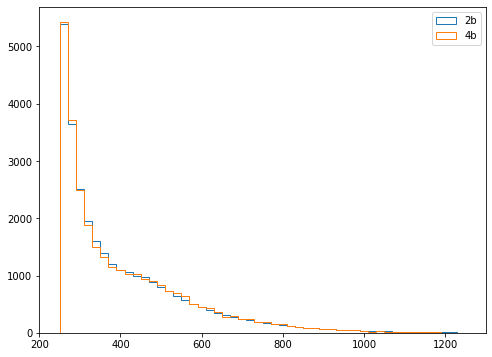

In [94]:
f, ax = plt.subplots(figsize=(8,6))
h2b, be, _ = plt.hist(
    df_cr.loc[mask2b, "m_hh_cor"].values,
    bins=50,
    histtype="step",
    range=(250, 1250),
    weights=norm*df_cr.loc[mask2b, "weight"].values,
    label="2b",
)
h4b, _, _ = plt.hist(
    df_cr.loc[mask4b, "m_hh_cor"].values, bins=be, histtype="step", label="4b"
)
plt.legend()

In [96]:
rw_columns

['pT_2_log',
 'pT_4_log',
 'eta_i',
 'dRjj_1_log',
 'dRjj_2_log',
 'njets',
 'pt_hh_log',
 'X_wt_log',
 'dR_hh',
 'dPhi_h1',
 'dPhi_h2']

In [95]:
model.plot()

AttributeError: 'CatBoostClassifier' object has no attribute 'plot'